### Laboratorio 5

grupo:
- Gabriela Contreras: 20213
- Paola de León: 20361
- Diego Córdova: 20212

In [18]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np

In [19]:
import gymnasium as gym

env = gym.make("CliffWalking-v0")

# Parametros
alpha = 0.1
gamma = 0.99
epsilon = 0.1
episodes = 500

max_steps_per_episode = 100

n_actions = env.action_space.n
n_states = env.observation_space.n

# Función epsilon-greedy
def epsilon_greedy_policy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(n_actions)
    else:
        return np.argmax(Q[state])

Q = np.zeros((n_states, n_actions))

### Implementacion de SARSA

In [20]:
# Algoritmo SARSA
# Code based on: https://www.geeksforgeeks.org/sarsa-reinforcement-learning/

def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action
 
#Function to learn the Q-value
def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

def sars_step(env, state, action):
    next_state, reward, done, _, _ = env.step(action)
    if done: return state, action
    next_action = epsilon_greedy_policy(next_state, Q, epsilon)

    update(state, next_state, reward, action, next_action)
    
    state = next_state
    action = next_action

    return state, action, reward


### Implementacion de Q-Learning

### Ejecucion de Algoritmos

In [25]:
# Trinning Loop

def trainnin_loop(alg, episodes=10, max_steps_per_episode=10):
    rewards_per_episode = []
    total_reward = 0

    for episode in range(episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(state, Q, epsilon)
        
        for step in range(max_steps_per_episode):
            new_state, new_action, reward = alg(env, state, action)
            total_reward += reward
            state, action = new_state, new_action

        rewards_per_episode.append(total_reward)

    return rewards_per_episode


### Graficos

[-10, -119, -228, -238, -248, -258, -268, -278, -288, -298]


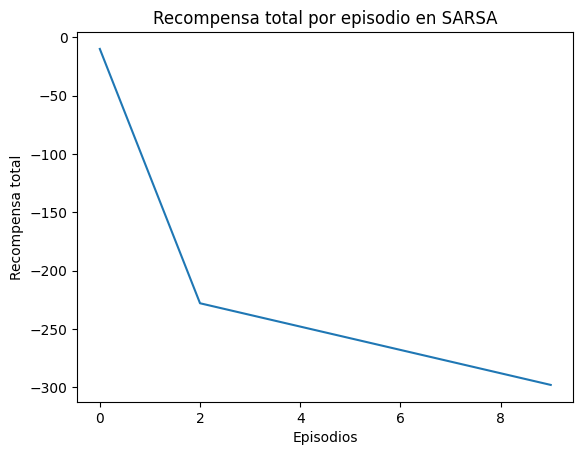

In [26]:
def plot_rewards(rewards_per_episode):
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa total')
    plt.title('Recompensa total por episodio en SARSA')
    plt.show()

history = trainnin_loop(sars_step)
print(history)
plot_rewards(history)

### Resultados